## Importing Necessary Libraries¶

In [1064]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## Load "leads" Data

In [1066]:
leads_df=pd.read_csv('Leads.csv')

## Inspect Data Quality

In [1068]:
leads_df.shape

(9240, 37)

In [1069]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1070]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1071]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Drop "Prospect ID" and "Lead Number" as these are the ID cols

In [1073]:
leads_df1 = leads_df.drop(["Prospect ID","Lead Number"],axis=1)

In [1074]:
leads_df1.shape

(9240, 35)

## Check for missing values

In [1076]:
leads_df1.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

## Replace 'Select' to NaN in cols "Specialization", "City", "How did you hear about X Education" and "Lead Profile"

In [1078]:
leads_df1["Specialization"].replace({'Select': np.nan}, inplace=True)
leads_df1["City"].replace({'Select': np.nan}, inplace=True)
leads_df1["How did you hear about X Education"].replace({'Select': np.nan}, inplace=True)
leads_df1["Lead Profile"].replace({'Select': np.nan}, inplace=True)

In [1079]:
leads_df1.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

## Drop cols with majority of the values as NULL (> 30%)

In [1081]:
leads_cut_off=30
leads_cols_to_drop=list(leads_df1.columns[100*leads_df1.isnull().mean()>leads_cut_off])
print(leads_cols_to_drop)

['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [1082]:
leads_df1.drop(leads_cols_to_drop,axis=1, inplace=True)

In [1083]:
leads_df1.shape

(9240, 25)

In [1084]:
leads_df1.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

## Identify the categorical and numerical cols
Any col having less than 50 uniq values, its categorical Col
Any col having more than 50 uniq values, its Numerical Col

In [1086]:
leads_df1.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [1087]:
leads_cat_cols=[]
leads_num_cols=[]
for col in leads_df1.columns:
    if leads_df1[col].nunique()>=40:
        leads_num_cols.append(col)
    else:
        leads_cat_cols.append(col)

In [1088]:
len(leads_cat_cols)

22

In [1089]:
leads_cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [1090]:
len(leads_num_cols)

3

In [1091]:
leads_num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

## Fill in the missing values with median for numerical cols and mode for categorical cols

In [1093]:
# Replacing missing values with median in case of numerical columns
for col in leads_num_cols:
    med = leads_df1[col].median()
    leads_df1[col] = leads_df1[col].fillna(med)

In [1094]:
# Replacing missing values with mode in case of categorical columns
for col in leads_cat_cols:
    mod = leads_df1[col].mode()[0]
    leads_df1[col] = leads_df1[col].fillna(mod)

In [1095]:
leads_df1.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

## Univariate Analysis of leads data

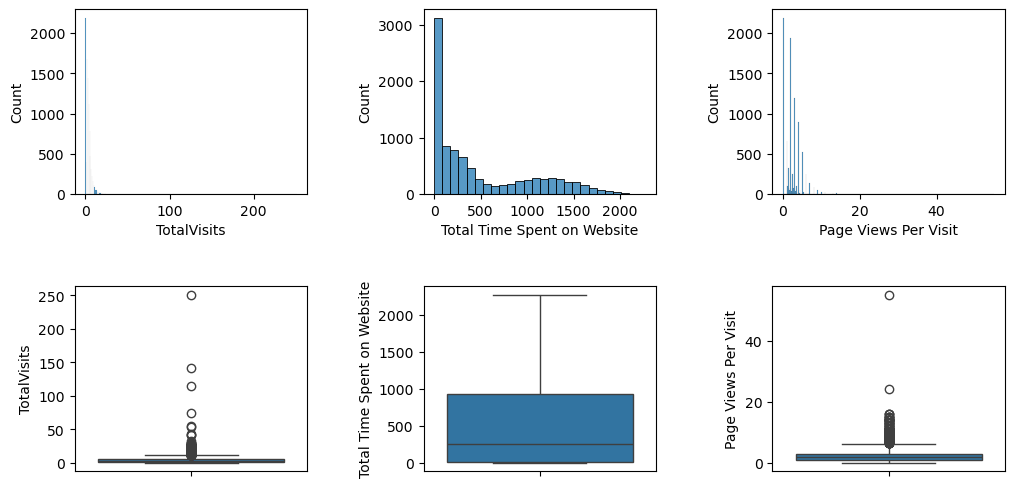

In [1097]:
plt.figure(figsize=(12,6))
i=1
for col in leads_num_cols:
    plt.subplot(2,3,i)
    sns.histplot(x=leads_df1[col])
    plt.subplots_adjust(wspace=0.5)
    plt.subplots_adjust(hspace=0.5)
    i = i+1

for col in leads_num_cols:
    plt.subplot(2,3,i)
    sns.boxplot(y=leads_df1[col])
    plt.subplots_adjust(wspace=0.5)
    plt.subplots_adjust(hspace=0.5)
    i = i+1
plt.show()

## Outlier Treatment

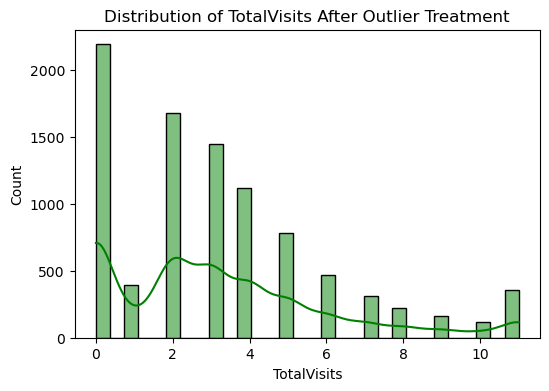

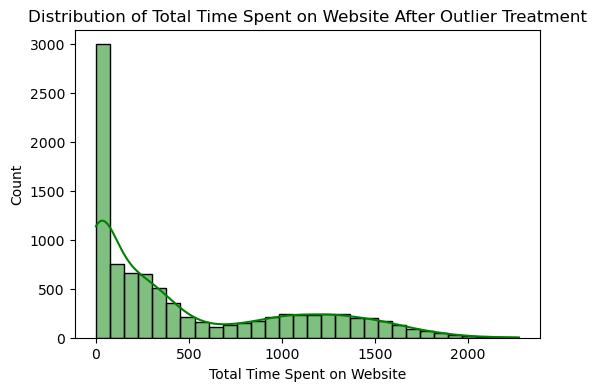

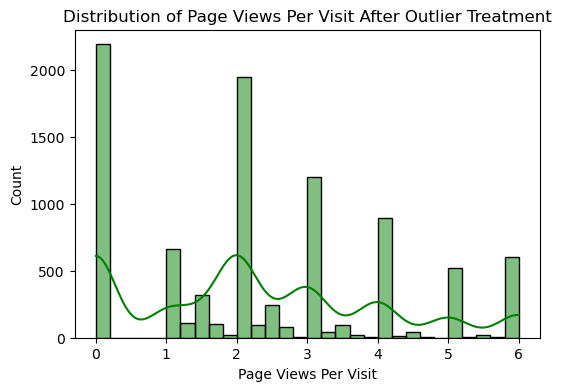

In [1099]:
# Checking outlier thresholds using IQR
Q1 = leads_df1[leads_num_cols].quantile(0.25)
Q3 = leads_df1[leads_num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers to upper and lower bounds
for col in leads_num_cols:
    leads_df1[col] = leads_df1[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Re-check distributions after outlier treatment
for col in leads_num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(leads_df1[col], bins=30, kde=True, color="green")
    plt.title(f"Distribution of {col} After Outlier Treatment")
    plt.xlabel(col)
    plt.show()

### Bivariate analysis for numerical cols

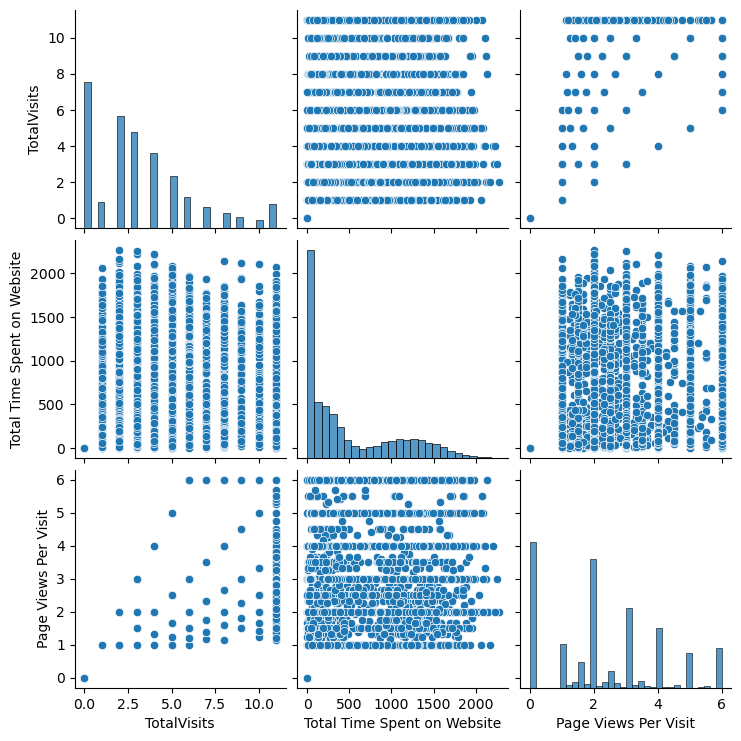

In [1101]:
sns.pairplot(leads_df1[leads_num_cols])
plt.show()

In [1102]:
# Create a dictionary to store frequency tables
category_summary = {}

# Generate tables for each categorical column
for col in leads_cat_cols:
    category_summary[col] = leads_df1[col].value_counts().reset_index()
    category_summary[col].columns = [col, "Count"]
    category_summary[col]["Percentage (%)"] = (category_summary[col]["Count"] / len(leads_df1)) * 100

# Display tables
for col, table in category_summary.items():
    print(f"\n### {col} ###\n")
    print(table)
    print("-" * 50)


### Lead Origin ###

               Lead Origin  Count  Percentage (%)
0  Landing Page Submission   4886       52.878788
1                      API   3580       38.744589
2            Lead Add Form    718        7.770563
3              Lead Import     55        0.595238
4           Quick Add Form      1        0.010823
--------------------------------------------------

### Lead Source ###

          Lead Source  Count  Percentage (%)
0              Google   2904       31.428571
1      Direct Traffic   2543       27.521645
2          Olark Chat   1755       18.993506
3      Organic Search   1154       12.489177
4           Reference    534        5.779221
5    Welingak Website    142        1.536797
6      Referral Sites    125        1.352814
7            Facebook     55        0.595238
8                bing      6        0.064935
9              google      5        0.054113
10         Click2call      4        0.043290
11      Press_Release      2        0.021645
12       Social Medi

In [1103]:
# Separate binary and multi-category categorical variables
binary_cat_cols = [col for col in leads_cat_cols if leads_df1[col].nunique() == 2]
multi_cat_cols = [col for col in leads_cat_cols if leads_df1[col].nunique() > 2]

print(len(binary_cat_cols))
print("Binary Categorical Variables:", binary_cat_cols)
print("------")
print(len(multi_cat_cols))
print("Multi-Category Categorical Variables:", multi_cat_cols)

10
Binary Categorical Variables: ['Do Not Email', 'Do Not Call', 'Converted', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']
------
7
Multi-Category Categorical Variables: ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity']


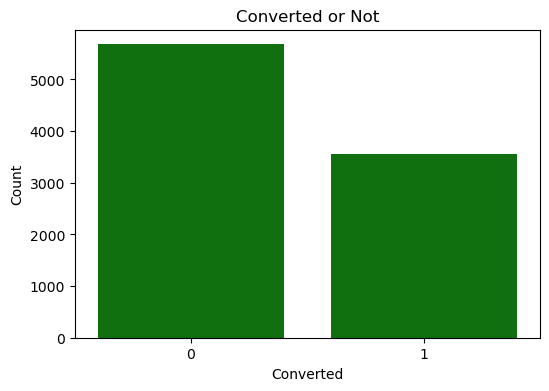

In [1104]:
plt.figure(figsize=(6,4))
sns.countplot(x=leads_df1["Converted"], color="green") 
plt.title("Converted or Not")
plt.xlabel("Converted")
plt.ylabel("Count")
plt.show()

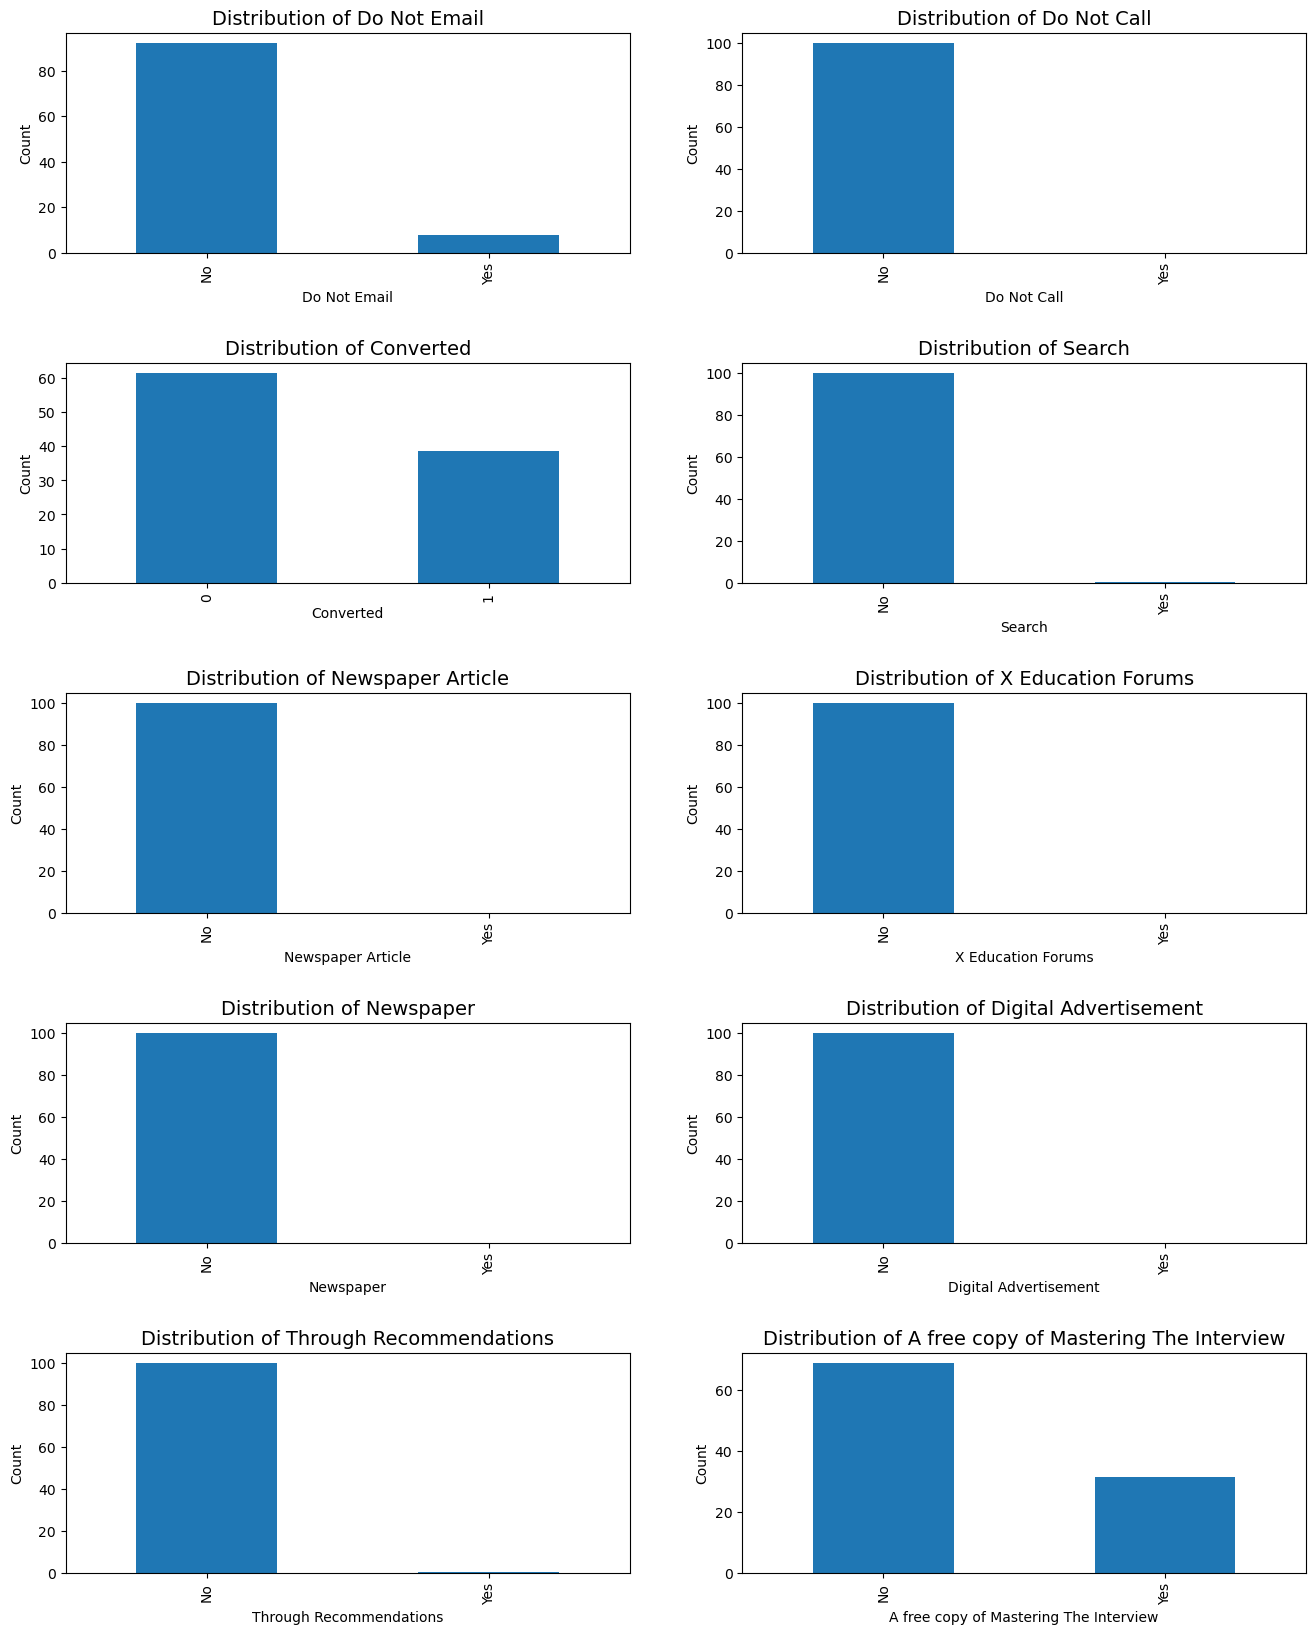

In [1105]:
plt.figure(figsize=(16,20))
i=1
for col in binary_cat_cols:
    plt.subplot(5,2,i)
    (leads_df1[col].value_counts(normalize=True)*100).plot.bar()
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.subplots_adjust(hspace=0.5)
    i=i+1

plt.show()

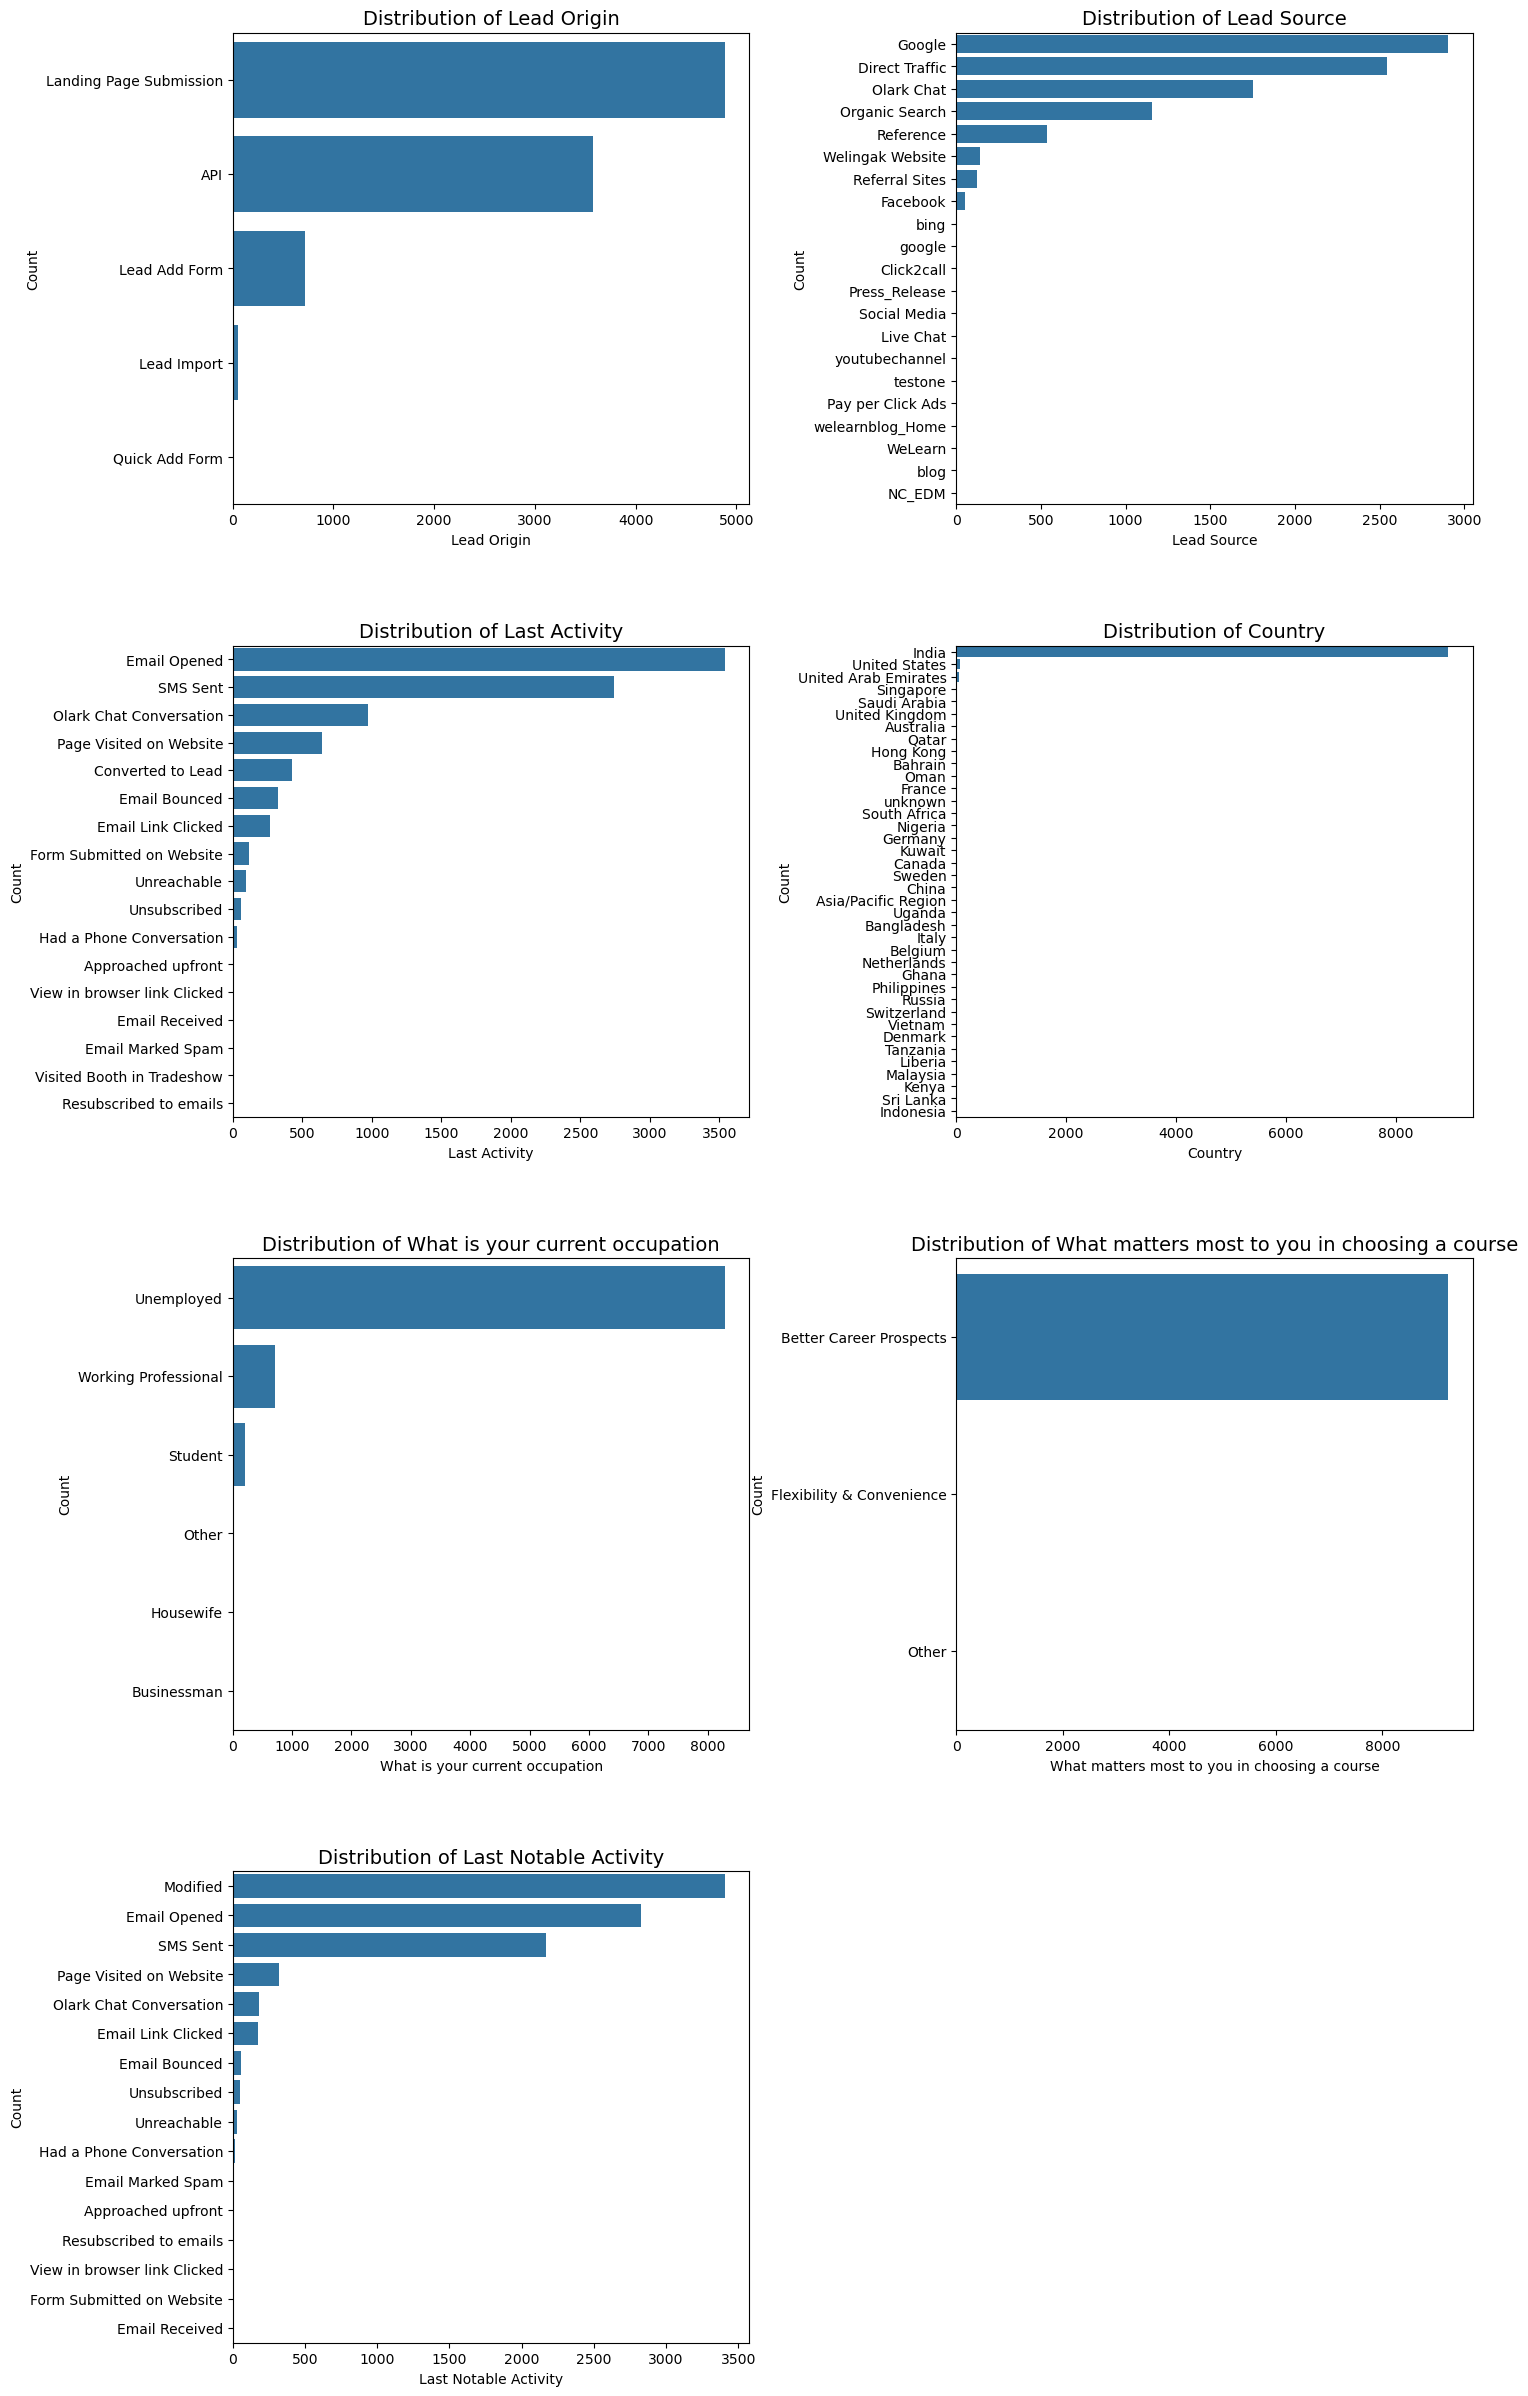

In [1106]:
plt.figure(figsize=(16,30))
i=1
for col in multi_cat_cols:
    plt.subplot(4,2,i)
    sns.countplot(y=leads_df1[col], order=leads_df1[col].value_counts().index)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.subplots_adjust(wspace=0.4)
    plt.subplots_adjust(hspace=0.3)
    i=i+1

plt.show()

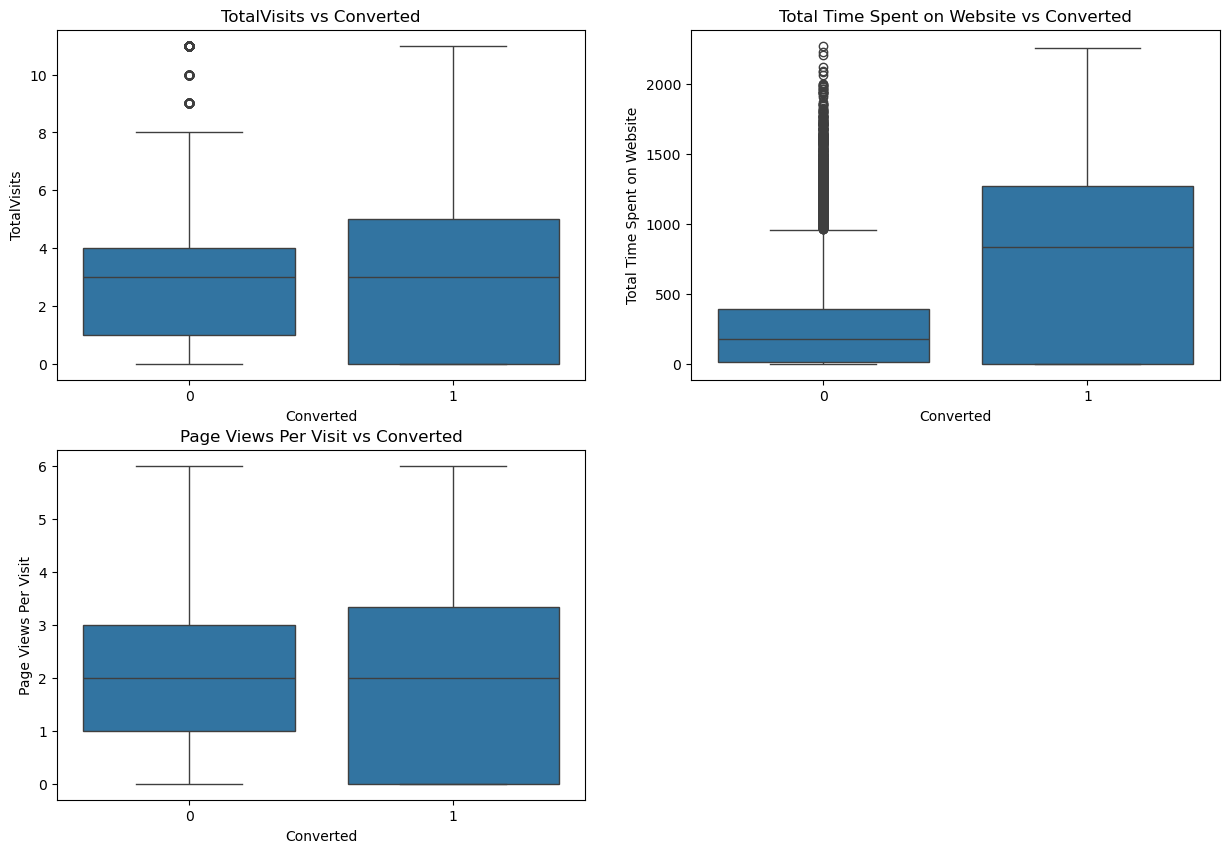

In [1107]:
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create boxplots
for i, col in enumerate(leads_num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=leads_df1["Converted"], y=leads_df1[col])
    plt.title(f"{col} vs Converted")

plt.show()

#### "Lead Origin" vs "Converted"

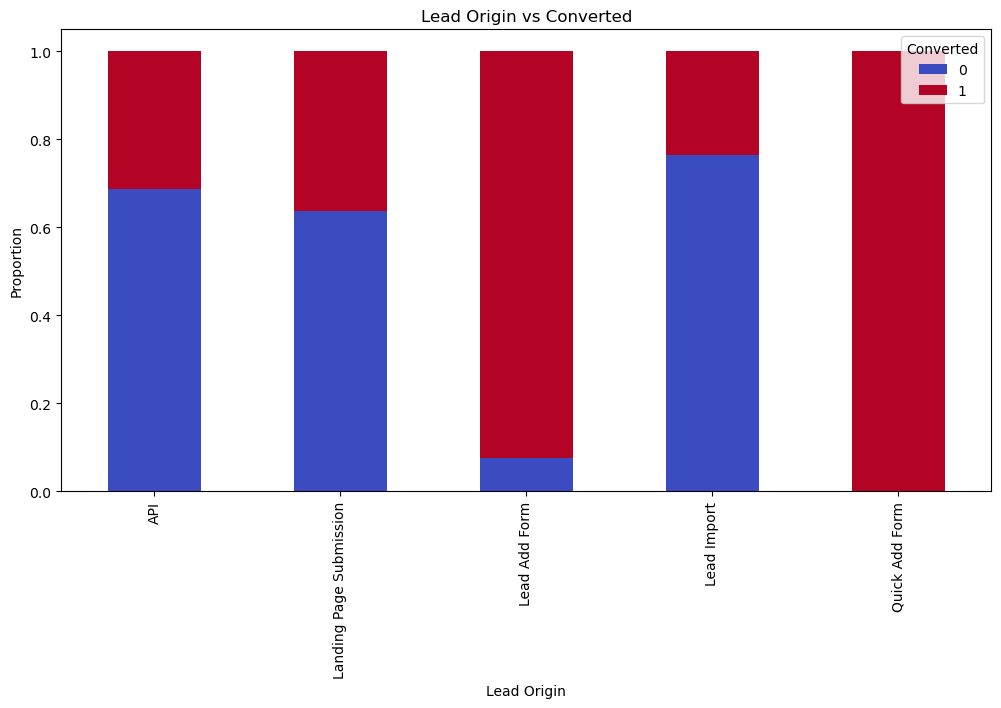

In [1109]:
# Analysis of "Lead Origin" and "Converted"
cat1, cat2 = "Lead Origin", "Converted"

# Create a normalized stacked bar chart
cross_tab = pd.crosstab(leads_df1[cat1], leads_df1[cat2], normalize="index")

# Plot stacked bar chart
cross_tab.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title(f"{cat1} vs {cat2}")
plt.ylabel("Proportion")
plt.legend(title=cat2)
plt.show()

#### "What is your current occupation" vs "Converted"

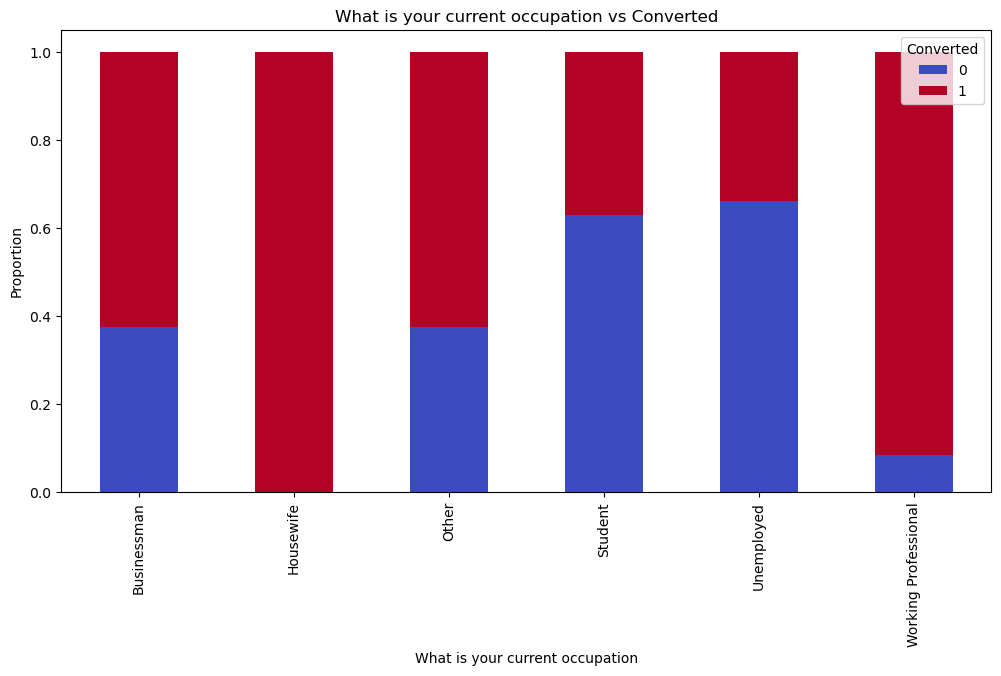

In [1111]:
# Analysis of "What is your current occupation" and "Converted"
cat1, cat2 = "What is your current occupation", "Converted"

# Create a normalized stacked bar chart
cross_tab = pd.crosstab(leads_df1[cat1], leads_df1[cat2], normalize="index")

# Plot stacked bar chart
cross_tab.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title(f"{cat1} vs {cat2}")
plt.ylabel("Proportion")
plt.legend(title=cat2)
plt.show()

## Multivariate Analysis

In [1113]:
leads_num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [1114]:
corr_matrix = leads_df1[['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr()
corr_matrix

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.046238,0.362483,-0.005289
TotalVisits,0.046238,1.000000,0.351107,0.753953
Total Time Spent on Website,0.362483,0.351107,1.000000,0.360425
Page Views Per Visit,-0.005289,0.753953,0.360425,1.000000


💡**Insight** :Variables `TotalVisits` and `Page Views Per Visit` are highly coorelated

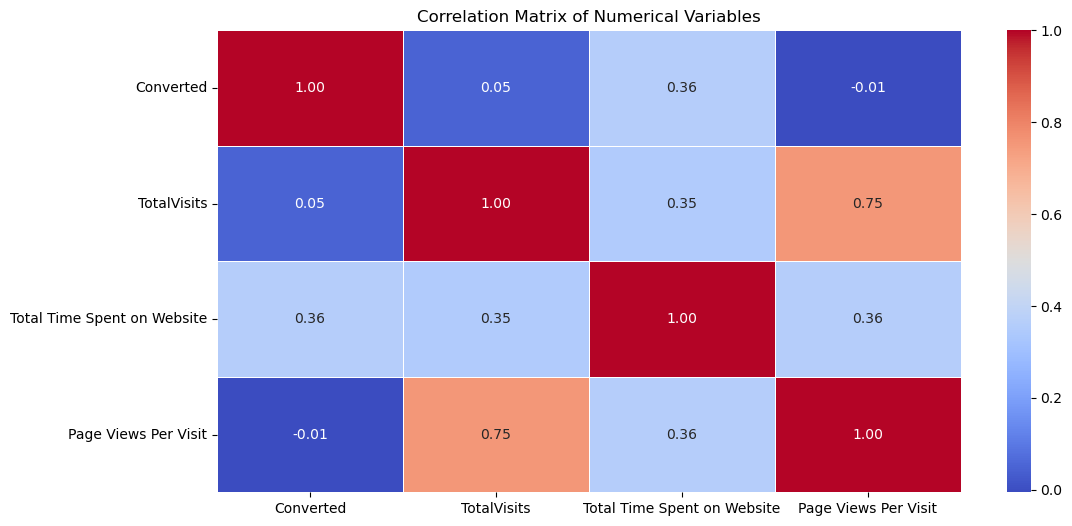

In [1116]:
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

## Data Preparation

### Convert some binary variables (Yes/No) to 0/1

In [1119]:
leads_cat_cols
len(leads_cat_cols)

22

In [1120]:
leads_cat_cols.remove('Converted')
leads_cat_cols
len(leads_cat_cols)

21

In [1121]:
leads_df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [1122]:
print(leads_df1.isnull().sum())

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

## For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [1124]:
# Creating dummy variables for multi-level categorical variables and dropping the first one.
leads_data = pd.get_dummies(leads_df1, columns=leads_cat_cols, drop_first=True, dtype = int)


In [1125]:
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1126]:
print(leads_data.isnull().sum())

Converted                                             0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
Lead Origin_Landing Page Submission                   0
                                                     ..
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 112, dtype: int64


## Test-Train Split

In [1128]:
from sklearn.model_selection import train_test_split

In [1129]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1130]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [1131]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [1133]:
from sklearn.preprocessing import MinMaxScaler

In [1134]:
leads_num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [1135]:
scaler = MinMaxScaler()

X_train[leads_num_cols] = scaler.fit_transform(X_train[leads_num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.363636,0.214349,0.221667,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.454545,0.046655,0.416667,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.454545,0.541373,0.833333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1136]:
print(X_train.dtypes)

TotalVisits                                           float64
Total Time Spent on Website                           float64
Page Views Per Visit                                  float64
Lead Origin_Landing Page Submission                     int64
Lead Origin_Lead Add Form                               int64
                                                       ...   
Last Notable Activity_Resubscribed to emails            int64
Last Notable Activity_SMS Sent                          int64
Last Notable Activity_Unreachable                       int64
Last Notable Activity_Unsubscribed                      int64
Last Notable Activity_View in browser link Clicked      int64
Length: 111, dtype: object


## Model Building

In [1138]:
import statsmodels.api as sm

### Model 1

In [1140]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6366
Model Family:                Binomial   Df Model:                          101
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Feb 2025   Deviance:                   1.5842e+05
Time:                        00:50:14   Pearson chi2:                 7.75e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    2.722e+15   6.85e+07   3.97e+07      0.000    2.72e+15    2.72e+15
TotalVisits                                                              1.039e+15   5.31e+06   1.96e+08      0.000    1.04e+15    1.04e+15
Total Time Spent on Website                                              3.209e+15   3.96e+06   8.09e+08      0.000    3.21e+15    3.21e+15
Page Views Per Visit                                                    -7.472e+14   5.16e+06  -1.45e+08      0.000   -7.47e+14   -7.47e+14
Lead Origin_Landing Page Submission                                     -7.845e+13   2.69e+06  -2.91e+07      0.000   -7.85e+13   -7.85e+13
Lead Origin_Lead Add Form                                                2.354e+15    1.3e+07   1.81e+08      0.000    2.35e+15    2.35e+15
Lead Origin_Lead Import                                                 -7.041e+14   4.88e+07  -1.44e+07      0.000   -7.04e+14   -7.04e+14
Lead Origin_Quick Add Form                                               5.818e+15   6.74e+07   8.63e+07      0.000    5.82e+15    5.82e+15
Lead Source_Direct Traffic                                                2.02e+15   4.09e+07   4.93e+07      0.000    2.02e+15    2.02e+15
Lead Source_Facebook                                                     2.521e+15   6.36e+07   3.96e+07      0.000    2.52e+15    2.52e+15
Lead Source_Google                                                       2.247e+15   4.08e+07    5.5e+07      0.000    2.25e+15    2.25e+15
Lead Source_Live Chat                                                    6.595e+15   6.13e+07   1.08e+08      0.000     6.6e+15     6.6e+15
Lead Source_NC_EDM                                                       4.828e+15   7.86e+07   6.14e+07      0.000    4.83e+15    4.83e+15
Lead Source_Olark Chat                                                   2.432e+15    4.1e+07   5.93e+07      0.000    2.43e+15    2.43e+15
Lead Source_Organic Search                                               2.069e+15    4.1e+07   5.05e+07      0.000    2.07e+15    2.07e+15
Lead Source_Pay per Click Ads                                           -9.924e+14   7.86e+07  -1.26e+07      0.000   -9.92e+14   -9.92e+14
Lead Source_Press_Release                                                6.206e+14    6.3e+07   9.85e+06      0.000    6.21e+14    6.21e+14
Lead Source_Reference                                                    1.946e+15    3.9e+07      5e+07      0.000    1.95e+15    1.95e+15
Lead Source_Referral Sites                                               1.922e+15   4.15e+07   4.63e+07      0.000    1.92e+15    1.92e+15
Lea

## Feature Selection Using RFE

In [1142]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1143]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [1144]:
rfe.support_

array([ True,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False])

In [1145]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 62),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Origin_Quick Add Form', False, 28),
 ('Lead Source_Direct Traffic', False, 33),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Live Chat', False, 73),
 ('Lead Source_NC_EDM', False, 52),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Pay per Click Ads', False, 71),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Social Media', False, 21),
 ('Lead Source_WeLearn', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 72),
 ('Lead Source_blog', False, 49),
 ('Lead Source_google', False, 25),
 ('Lead Source_testone', False, 96),
 ('

In [1146]:
col = X_train.columns[rfe.support_]

In [1147]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Call_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubsc

### Model 2

In [1149]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.8
Date:                Tue, 18 Feb 2025   Deviance:                       5467.7
Time:                        00:50:22   Pearson chi2:                 7.55e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3837
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5648      0.107    -23.942      0.000      -2.775      -2.355
TotalVisits                                              1.3454      0.190      7.082      0.000       0.973       1.718
Total Time Spent on Website                              4.5231      0.162     27.914      0.000       4.206       4.841
Page Views Per Visit                                    -0.8914      0.191     -4.670      0.000      -1.266      -0.517
Lead Origin_Lead Add Form                                3.7314      0.202     18.517      0.000       3.336       4.126
Lead Source_Olark Chat                                   1.2735      0.126     10.124      0.000       1.027       1.520
Lead Source_Welingak Website                             1.9763      0.744      2.658      0.008       0.519       3.434
Do Not Email_Yes                                        -1.4035      0.162     -8.643      0.000      -1.722      -1.085
Last Activity_Had a Phone Conversation                   0.6662      0.962      0.693      0.489      -1.219       2.552
Last Activity_Olark Chat Conversation                   -1.3245      0.164     -8.065      0.000      -1.646      -1.003
Last Activity_SMS Sent                                   1.3708      0.073     18.678      0.000       1.227       1.515
Country_Qatar                                          -22.9772   2.42e+04     -0.001      0.999   -4.74e+04    4.73e+04
What is your current occupation_Housewife               24.1065   2.25e+04      0.001      0.999   -4.42e+04    4.42e+04
What is your current occupation_Working Professional     2.8321      0.186     15.239      0.000       2.468       3.196
Last Notable Activity_Had a Phone Conversation           2.9230      1.464      1.996      0.046       0.053       5.793
Last Notable Activity_Unreachable                        1.8519      0.513      3.612      0.000       0.847       2.857
========================================================================================================================
"""

## Checking VIFs

In [1151]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.76
0,TotalVisits,5.15
1,Total Time Spent on Website,2.04
7,Last Activity_Had a Phone Conversation,2.02
13,Last Notable Activity_Had a Phone Conversation,2.01
9,Last Activity_SMS Sent,1.51
4,Lead Source_Olark Chat,1.42
3,Lead Origin_Lead Add Form,1.39
8,Last Activity_Olark Chat Conversation,1.39
5,Lead Source_Welingak Website,1.24


### 'As Page Views Per Visit' has VIF of 5.76 (> 5), drop it

In [1154]:
col = col.drop('Page Views Per Visit', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_Qatar', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 3

In [1156]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.9
Date:                Tue, 18 Feb 2025   Deviance:                       5489.7
Time:                        00:50:23   Pearson chi2:                 7.65e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3816
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7934      0.097    -28.870      0.000      -2.983      -2.604
TotalVisits                                              0.8465      0.158      5.364      0.000       0.537       1.156
Total Time Spent on Website                              4.4946      0.162     27.818      0.000       4.178       4.811
Lead Origin_Lead Add Form                                3.9537      0.197     20.111      0.000       3.568       4.339
Lead Source_Olark Chat                                   1.5050      0.117     12.908      0.000       1.276       1.734
Lead Source_Welingak Website                             1.9906      0.744      2.677      0.007       0.533       3.448
Do Not Email_Yes                                        -1.4039      0.162     -8.654      0.000      -1.722      -1.086
Last Activity_Had a Phone Conversation                   0.5681      0.947      0.600      0.548      -1.288       2.424
Last Activity_Olark Chat Conversation                   -1.3133      0.164     -7.998      0.000      -1.635      -0.991
Last Activity_SMS Sent                                   1.3292      0.072     18.339      0.000       1.187       1.471
Country_Qatar                                          -22.9931   2.42e+04     -0.001      0.999   -4.74e+04    4.74e+04
What is your current occupation_Housewife               24.1410   2.23e+04      0.001      0.999   -4.37e+04    4.38e+04
What is your current occupation_Working Professional     2.8153      0.186     15.174      0.000       2.452       3.179
Last Notable Activity_Had a Phone Conversation           3.0109      1.448      2.080      0.038       0.173       5.849
Last Notable Activity_Unreachable                        1.8254      0.516      3.540      0.000       0.815       2.836
========================================================================================================================
"""

### Let's check the VIFs again

In [1158]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,2.02
12,Last Notable Activity_Had a Phone Conversation,2.01
1,Total Time Spent on Website,1.93
0,TotalVisits,1.92
8,Last Activity_SMS Sent,1.44
3,Lead Source_Olark Chat,1.41
7,Last Activity_Olark Chat Conversation,1.39
2,Lead Origin_Lead Add Form,1.38
4,Lead Source_Welingak Website,1.24
11,What is your current occupation_Working Profes...,1.18


### VIF for all the features are < 5. Now inspect the p-values. Dropping Country_Qatar as its p-value 0.999 is high (> 0.05)

In [1160]:
col = col.drop('Country_Qatar', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 4

In [1162]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.2
Date:                Tue, 18 Feb 2025   Deviance:                       5496.4
Time:                        00:50:24   Pearson chi2:                 7.66e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7977      0.097    -28.925      0.000      -2.987      -2.608
TotalVisits                                              0.8538      0.158      5.412      0.000       0.545       1.163
Total Time Spent on Website                              4.4876      0.161     27.816      0.000       4.171       4.804
Lead Origin_Lead Add Form                                3.9575      0.197     20.132      0.000       3.572       4.343
Lead Source_Olark Chat                                   1.5088      0.117     12.943      0.000       1.280       1.737
Lead Source_Welingak Website                             1.9905      0.744      2.677      0.007       0.533       3.448
Do Not Email_Yes                                        -1.4009      0.162     -8.636      0.000      -1.719      -1.083
Last Activity_Had a Phone Conversation                   0.5721      0.947      0.604      0.546      -1.284       2.428
Last Activity_Olark Chat Conversation                   -1.3119      0.164     -7.990      0.000      -1.634      -0.990
Last Activity_SMS Sent                                   1.3292      0.072     18.353      0.000       1.187       1.471
What is your current occupation_Housewife               23.1440   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
What is your current occupation_Working Professional     2.8180      0.186     15.190      0.000       2.454       3.182
Last Notable Activity_Had a Phone Conversation           3.0083      1.448      2.078      0.038       0.171       5.846
Last Notable Activity_Unreachable                        1.8269      0.516      3.543      0.000       0.816       2.837
========================================================================================================================
"""

### Let's check the VIFs again

In [1164]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,2.02
11,Last Notable Activity_Had a Phone Conversation,2.01
1,Total Time Spent on Website,1.93
0,TotalVisits,1.92
8,Last Activity_SMS Sent,1.44
3,Lead Source_Olark Chat,1.41
7,Last Activity_Olark Chat Conversation,1.39
2,Lead Origin_Lead Add Form,1.38
4,Lead Source_Welingak Website,1.24
10,What is your current occupation_Working Profes...,1.18


### Dropping "What is your current occupation_Housewife" as its p-value 0.999 is high (> 0.05)

In [1166]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 5

In [1168]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.1
Date:                Tue, 18 Feb 2025   Deviance:                       5512.2
Time:                        00:50:25   Pearson chi2:                 7.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7823      0.096    -28.864      0.000      -2.971      -2.593
TotalVisits                                              0.8410      0.158      5.338      0.000       0.532       1.150
Total Time Spent on Website                              4.4840      0.161     27.830      0.000       4.168       4.800
Lead Origin_Lead Add Form                                3.9695      0.196     20.239      0.000       3.585       4.354
Lead Source_Olark Chat                                   1.4977      0.116     12.872      0.000       1.270       1.726
Lead Source_Welingak Website                             1.9679      0.743      2.647      0.008       0.511       3.425
Do Not Email_Yes                                        -1.4069      0.162     -8.673      0.000      -1.725      -1.089
Last Activity_Had a Phone Conversation                   0.5617      0.947      0.593      0.553      -1.295       2.418
Last Activity_Olark Chat Conversation                   -1.3170      0.164     -8.023      0.000      -1.639      -0.995
Last Activity_SMS Sent                                   1.3205      0.072     18.255      0.000       1.179       1.462
What is your current occupation_Working Professional     2.8112      0.185     15.157      0.000       2.448       3.175
Last Notable Activity_Had a Phone Conversation           3.0105      1.448      2.079      0.038       0.173       5.848
Last Notable Activity_Unreachable                        1.8189      0.516      3.528      0.000       0.809       2.829
========================================================================================================================
"""

### Let's check the VIFs again

In [1170]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,2.02
10,Last Notable Activity_Had a Phone Conversation,2.01
1,Total Time Spent on Website,1.93
0,TotalVisits,1.92
8,Last Activity_SMS Sent,1.44
3,Lead Source_Olark Chat,1.41
7,Last Activity_Olark Chat Conversation,1.39
2,Lead Origin_Lead Add Form,1.38
4,Lead Source_Welingak Website,1.24
9,What is your current occupation_Working Profes...,1.18


### Dropping "Last Activity_Had a Phone Conversation" as its p-value 0.553 is high (> 0.05)

In [1172]:
col = col.drop('Last Activity_Had a Phone Conversation', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 6

In [1174]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.3
Date:                Tue, 18 Feb 2025   Deviance:                       5512.5
Time:                        00:50:25   Pearson chi2:                 7.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7814      0.096    -28.861      0.000      -2.970      -2.592
TotalVisits                                              0.8401      0.158      5.332      0.000       0.531       1.149
Total Time Spent on Website                              4.4862      0.161     27.849      0.000       4.171       4.802
Lead Origin_Lead Add Form                                3.9719      0.196     20.255      0.000       3.588       4.356
Lead Source_Olark Chat                                   1.4972      0.116     12.868      0.000       1.269       1.725
Lead Source_Welingak Website                             1.9651      0.743      2.643      0.008       0.508       3.422
Do Not Email_Yes                                        -1.4075      0.162     -8.675      0.000      -1.726      -1.090
Last Activity_Olark Chat Conversation                   -1.3178      0.164     -8.028      0.000      -1.640      -0.996
Last Activity_SMS Sent                                   1.3193      0.072     18.244      0.000       1.178       1.461
What is your current occupation_Working Professional     2.8135      0.185     15.176      0.000       2.450       3.177
Last Notable Activity_Had a Phone Conversation           3.5715      1.096      3.258      0.001       1.423       5.720
Last Notable Activity_Unreachable                        1.8181      0.516      3.526      0.000       0.808       2.829
========================================================================================================================
"""

### Let's check the VIFs again

In [1176]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.93
0,TotalVisits,1.92
7,Last Activity_SMS Sent,1.44
3,Lead Source_Olark Chat,1.41
6,Last Activity_Olark Chat Conversation,1.39
2,Lead Origin_Lead Add Form,1.37
4,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.18
5,Do Not Email_Yes,1.06
10,Last Notable Activity_Unreachable,1.01


 ### All p-values are < 0.05 and VIFs are < 5. Model 6 is now trained

In [1178]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1179]:
y_train_pred

array([0.21684639, 0.18030424, 0.33336848, ..., 0.21684639, 0.1035214 ,
       0.21684639])

In [1180]:
len(y_train_pred)

6468

In [1181]:
y_train_pred[:10]

array([0.21684639, 0.18030424, 0.33336848, 0.79388302, 0.21684639,
       0.9902692 , 0.11115851, 0.99265574, 0.25054037, 0.86451285])

In [1182]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()
#y_train_pred_final['Converted_Prob'] = y_train_pred

,Converted,Converted_Prob
0,0,0.216846
1,0,0.180304
2,0,0.333368
3,0,0.793883
4,0,0.216846


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [1184]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.216846,0
1,0,0.180304,0
2,0,0.333368,0
3,0,0.793883,1
4,0,0.216846,0


In [1185]:
from sklearn import metrics

In [1186]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3512  490]
 [ 741 1725]]


In [1187]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.809678416821274


## Metrics beyond simply accuracy

In [1189]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1190]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6995133819951338

In [1191]:
# Let us calculate specificity
TN / float(TN+FP)

0.8775612193903048

In [1192]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.12243878060969515


In [1193]:
# positive predictive value 
print (TP / float(TP+FP))

0.7787810383747178


In [1194]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8257700446743476


## Plotting the ROC Curve

In [1196]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1197]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

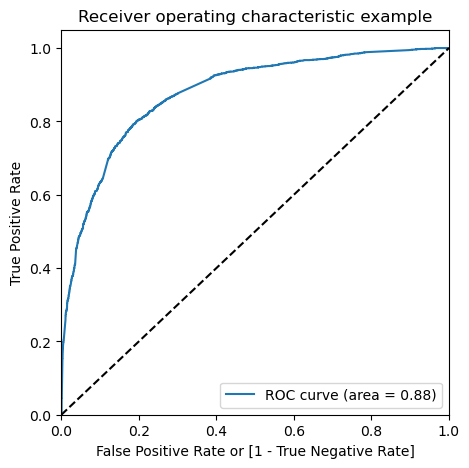

In [1198]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point

In [1200]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.216846,0,1,1,1,0,0,0,0,0,0,0
1,0,0.180304,0,1,1,0,0,0,0,0,0,0,0
2,0,0.333368,0,1,1,1,1,0,0,0,0,0,0
3,0,0.793883,1,1,1,1,1,1,1,1,1,0,0
4,0,0.216846,0,1,1,1,0,0,0,0,0,0,0


In [1201]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.591682  0.967153  0.360320
0.2   0.2  0.727891  0.923763  0.607196
0.3   0.3  0.793290  0.826034  0.773113
0.4   0.4  0.807823  0.757908  0.838581
0.5   0.5  0.809678  0.699513  0.877561
0.6   0.6  0.792362  0.580292  0.923038
0.7   0.7  0.778139  0.504866  0.946527
0.8   0.8  0.745053  0.379157  0.970515
0.9   0.9  0.715986  0.272912  0.989005


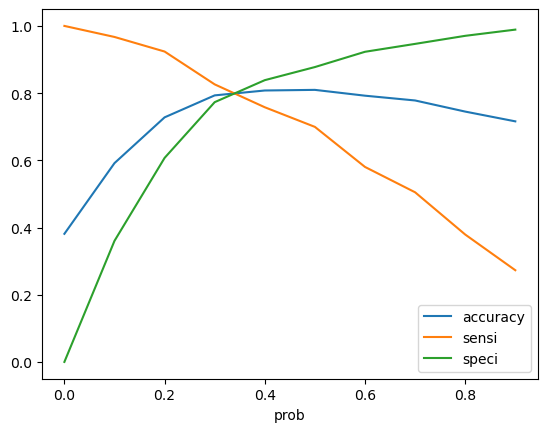

In [1202]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [1204]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.216846,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.180304,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.333368,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.793883,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.216846,0,1,1,1,0,0,0,0,0,0,0,0


In [1205]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7985466914038343

In [1206]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3167,  835],
       [ 468, 1998]])

In [1207]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1208]:
print("Sensitivity / Recall: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("False postive rate: ",FP/ float(TN+FP))
print("Positive predictive value / Precision : ",TP / float(TP+FP))
print("Negative predictive value : ",TN / float(TN+ FN))

Sensitivity / Recall:  0.8102189781021898
Specificity:  0.7913543228385808
False postive rate:  0.2086456771614193
Positive predictive value / Precision :  0.705259442287328
Negative predictive value :  0.8712517193947731


In [1209]:
from sklearn.metrics import precision_score, recall_score

In [1210]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.705259442287328

In [1211]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8102189781021898

### Recall is coming out to 81.02%

## Precision and recall tradeoff

In [1214]:
from sklearn.metrics import precision_recall_curve

In [1215]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [1216]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

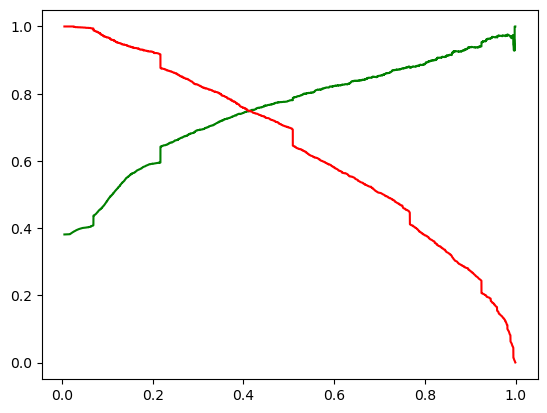

In [1217]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [1219]:
X_test[leads_num_cols] = scaler.transform(X_test[leads_num_cols])

In [1220]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4269,0.727273,0.444982,0,0,0,0,0,1,0,0,0
2376,0.000000,0.000000,1,0,0,0,0,1,0,0,0
7766,0.454545,0.025968,0,0,0,0,0,0,1,0,1
9199,0.000000,0.000000,0,1,0,0,1,0,0,0,0
4359,0.000000,0.000000,1,0,0,0,0,0,0,0,0


In [1221]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [1223]:
y_test_pred = res.predict(X_test_sm)

In [1224]:
y_test_pred[:10]

4269    0.758627
2376    0.924830
7766    0.912820
9199    0.069012
4359    0.766840
9186    0.550965
1631    0.401483
8963    0.116800
8007    0.133192
5324    0.285560
dtype: float64

In [1225]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1226]:
# Let's see the head
y_pred_1.head()

,0
4269,0.758627
2376,0.924830
7766,0.912820
9199,0.069012
4359,0.766840


In [1227]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1228]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1229]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1230]:
y_pred_final.head()

,Converted,0
0,1,0.758627
1,1,0.924830
2,1,0.912820
3,0,0.069012
4,1,0.766840


In [1231]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1232]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob
0,1,0.758627
1,1,0.924830
2,1,0.912820
3,0,0.069012
4,1,0.766840


In [1233]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [1234]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.758627,1
1,1,0.924830,1
2,1,0.912820,1
3,0,0.069012,0
4,1,0.766840,1


In [1235]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8033910533910534

In [1236]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1346,  331],
       [ 214,  881]])

In [1237]:
test_TP = confusion3[1,1] # true positive 
test_TN = confusion3[0,0] # true negatives
test_FP = confusion3[0,1] # false positives
test_FN = confusion3[1,0] # false negatives

In [1238]:
print("Sensitivity / Recall: ",test_TP / float(test_TP+test_FN))
print("Specificity: ",test_TN / float(test_TN+test_FP))
print("False postive rate: ",test_FP/ float(test_TN+test_FP))
print("Positive predictive value / Precision : ",test_TP / float(test_TP+test_FP))
print("Negative predictive value : ",test_TN / float(test_TN+ test_FN))

Sensitivity / Recall:  0.8045662100456621
Specificity:  0.802623732856291
False postive rate:  0.197376267143709
Positive predictive value / Precision :  0.726897689768977
Negative predictive value :  0.8628205128205129


In [1239]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.726897689768977

In [1240]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8045662100456621